## Imports

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [7, 5]

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

In [53]:
df = pd.read_csv('./data/cleaned_student_lifetyle_dataset.csv')

In [54]:
df.head()

,Student_ID,Study_Hours,Extracurricular_Hours,Sleep_Hours,Social_Hours,Physical_Activity_Hours,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [55]:
df.head()

,Student_ID,Study_Hours,Extracurricular_Hours,Sleep_Hours,Social_Hours,Physical_Activity_Hours,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [56]:
df.shape

(1954, 8)

In [57]:
df['Stress_Level'] = pd.Categorical(df['Stress_Level'], ordered=True, categories=['Low', 'Moderate', 'High'])

## Classification Practice

In [58]:
X = df.drop(columns=['Stress_Level', 'GPA'])
y = df['Stress_Level']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, stratify=y, random_state=42)

In [60]:
sc = StandardScaler()

In [61]:
X_train_sc = sc.fit_transform(X_train)

In [62]:
X_test_sc = sc.transform(X_test)

In [63]:
scores = []
for neighbors in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train_sc, y_train)
    scores.append({'K': neighbors, 'Score': knn.score(X_test_sc, y_test)})

In [64]:
scores_df = pd.DataFrame(scores)

In [65]:
scores_df.sort_values(by='Score', ascending=False)

,K,Score
16,17,0.918561
15,16,0.918561
17,18,0.918561
14,15,0.914773
8,9,0.914773
13,14,0.912879
5,6,0.910985
18,19,0.910985
10,11,0.910985
6,7,0.909091


<Axes: xlabel='K', ylabel='Score'>

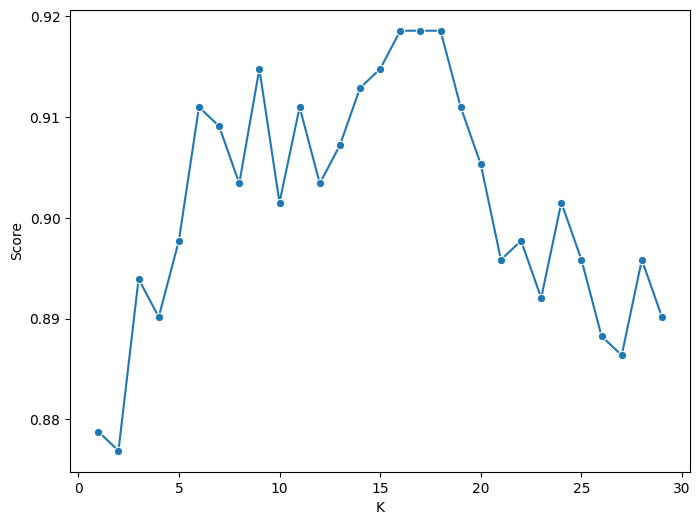

In [66]:
sns.lineplot(data=scores_df, x='K', y='Score', marker='o')

> An n_neighbors of 17 seems to work the best (16,17,18 all have the same accuracy), with an accuracy score of ~0.92

In [67]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_sc, y_train)

,n_neighbors,17
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [68]:
y_preds = knn.predict(X_test_sc)

In [69]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

        High       0.95      0.96      0.95       271
         Low       0.96      0.72      0.83        76
    Moderate       0.87      0.93      0.90       181

    accuracy                           0.92       528
   macro avg       0.93      0.87      0.89       528
weighted avg       0.92      0.92      0.92       528



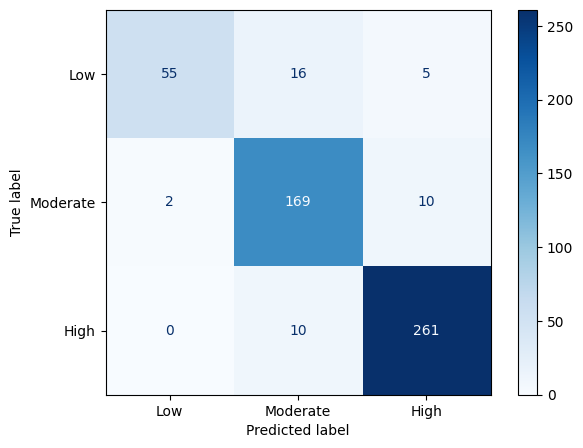

In [74]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap='Blues', labels=['Low', 'Moderate', 'High'])